In [22]:
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)


In [24]:
df = pd.read_csv("data.csv") #corrected argument name


In [25]:
df.head

<bound method NDFrame.head of             date  temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]>

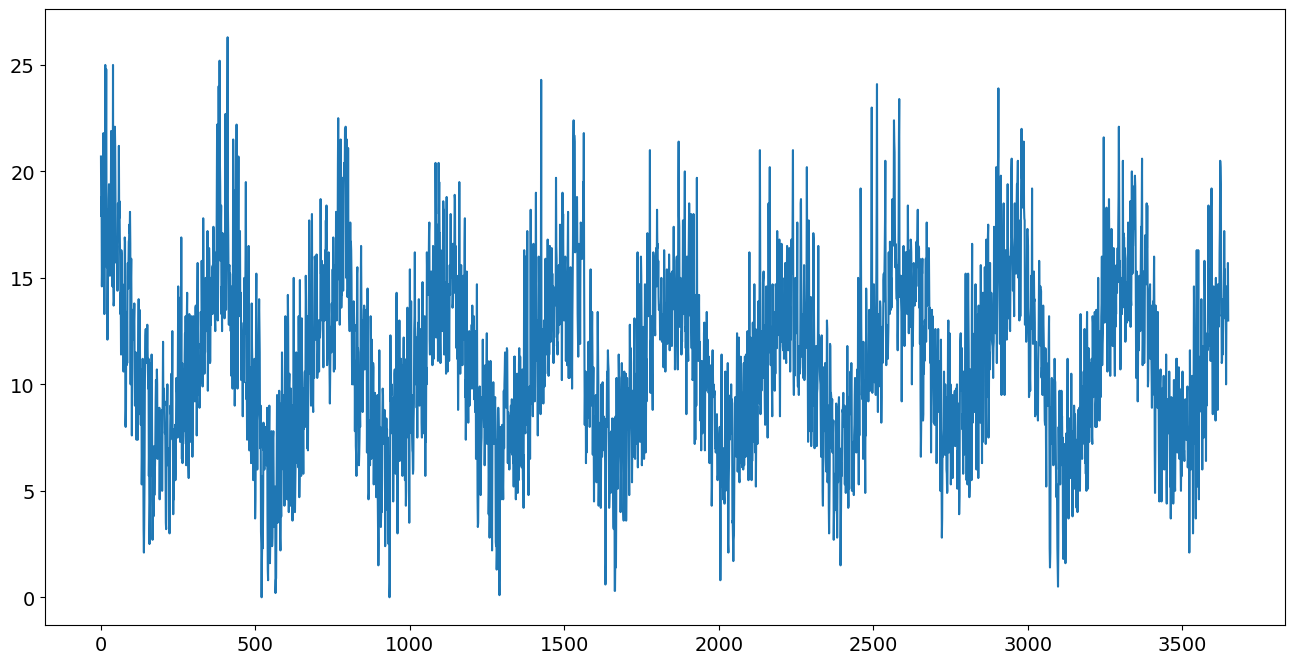

In [26]:
plt.plot(df['temp'])

In [36]:
df['ma2'] = df['temp'].rolling(2).mean()
df['ma10'] = df['temp'].rolling(10).mean()
df['ma30'] = df['temp'].rolling(30).mean()

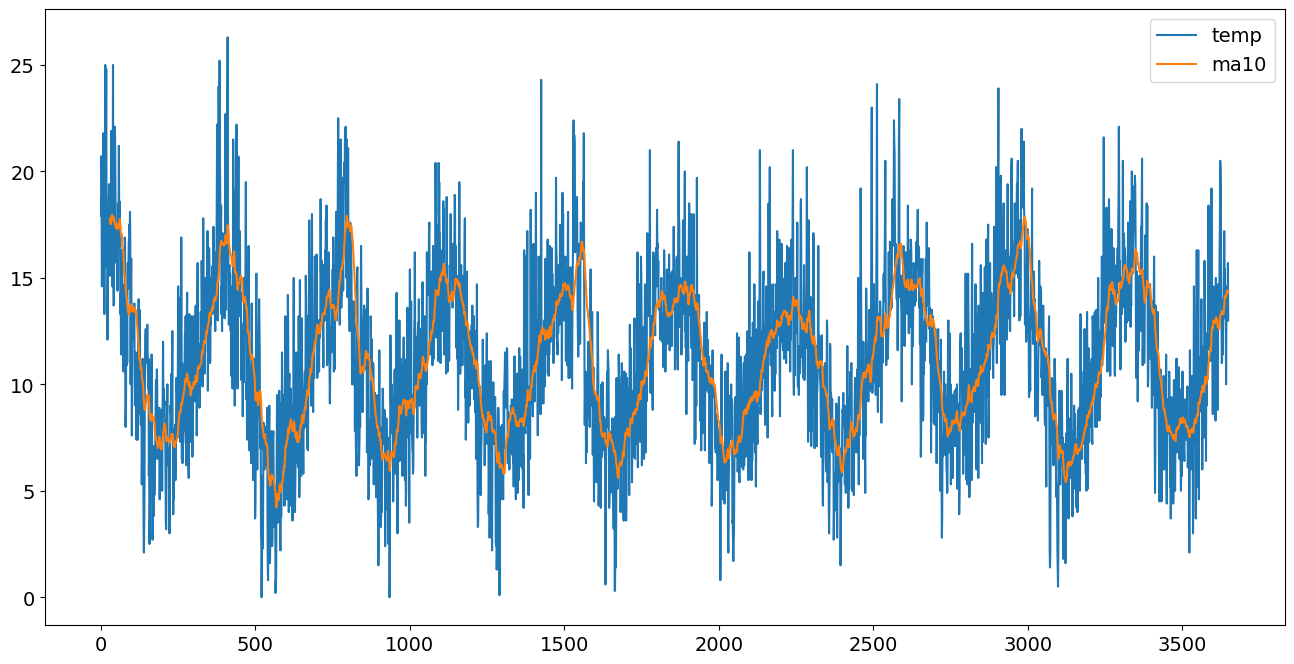

In [38]:
plt.plot(df['temp'])
# plt.plot(df['ma2'])
# plt.plot(df['ma10'])
plt.plot(df['ma30'])
plt.legend(['temp', 'ma10', 'ma30'])


In [40]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.15.0


In [52]:
# Load and prepare the data
data = pd.read_csv('data.csv', parse_dates=[0])
X = data.iloc[:, 0:1]  # Features - date
y = data.iloc[:, 1]  # Target - temperature

,date
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3645,1990-12-27
3646,1990-12-28
3647,1990-12-29
3648,1990-12-30


In [59]:

# Create rolling window dataset
def create_dataset(X, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(X.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 2
X_series, y_series = create_dataset(y, time_steps)


In [60]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

In [62]:
# Train the model
model.fit(X_series, y_series, epochs=30)

Epoch 1/30
114/114 [==============================] - 0s 844us/step - loss: 8.0645 - mean_absolute_error: 2.2017
Epoch 2/30
114/114 [==============================] - 0s 638us/step - loss: 8.1191 - mean_absolute_error: 2.2272
Epoch 3/30
114/114 [==============================] - 0s 737us/step - loss: 7.9395 - mean_absolute_error: 2.2173
Epoch 4/30
114/114 [==============================] - 0s 727us/step - loss: 7.8545 - mean_absolute_error: 2.1961
Epoch 5/30
114/114 [==============================] - 0s 692us/step - loss: 7.7645 - mean_absolute_error: 2.1765
Epoch 6/30
114/114 [==============================] - 0s 577us/step - loss: 7.4423 - mean_absolute_error: 2.1456
Epoch 7/30
114/114 [==============================] - 0s 832us/step - loss: 7.6605 - mean_absolute_error: 2.1644
Epoch 8/30
114/114 [==============================] - 0s 644us/step - loss: 7.6168 - mean_absolute_error: 2.1536
Epoch 9/30
114/114 [==============================] - 0s 757us/step - loss: 7.5643 - mean_absolu

In [63]:
# Evaluate the model
model.evaluate(X_series, y_series, verbose=2)

114/114 - 0s - loss: 6.5533 - mean_absolute_error: 1.9930 - 143ms/epoch - 1ms/step


[6.553310394287109, 1.9930227994918823]